# EDA_Univariate And Multivariate

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("cubic_zirconia.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [6]:
data = df.drop('Unnamed: 0',axis=1)

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
dic = pd.read_excel("Data Dictionary.xlsx")

In [9]:
dic

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


# Data pre-Processing

In [10]:
data.shape #shape of data

(26967, 10)

In [11]:
data.isnull().sum()                #null values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [12]:
# fill mean in nullvalues
data['depth'] = data['depth'].fillna(data['depth'].mean())

In [13]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
# no null values

In [15]:
# Drop those data with x = 0, y = 0, z = 0 
data = data[data['x'] != 0]
data = data[data['y'] != 0]
data = data[data['z'] != 0]

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(26925, 10)

In [37]:
data.describe().round(2).style.background_gradient(cmap='Blues')


,carat,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.800000,61.750000,57.460000,5.730000,5.730000,3.540000,3936.250000
std,0.480000,1.390000,2.230000,1.130000,1.160000,0.720000,4020.980000
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


# EDA

In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

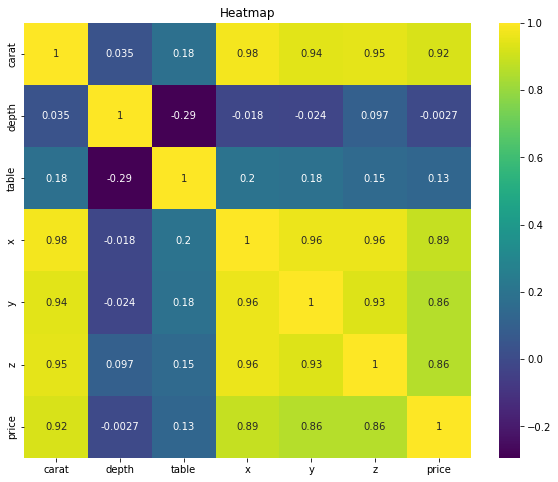

In [28]:
#Correlation of data
plt.figure(figsize = (10,8))

sns.heatmap(data = data.corr(), cmap = 'viridis',annot=True)
plt.title('Heatmap')
plt.show()

* From the heatmap,
     * carat and price are corelated
     * x, y, z are strongly corelated
     * x, y, z having corelation with price
* It seems depth and table are negative co relation and weak relation with price

# Univariate Analysis


C:\Users\graje\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


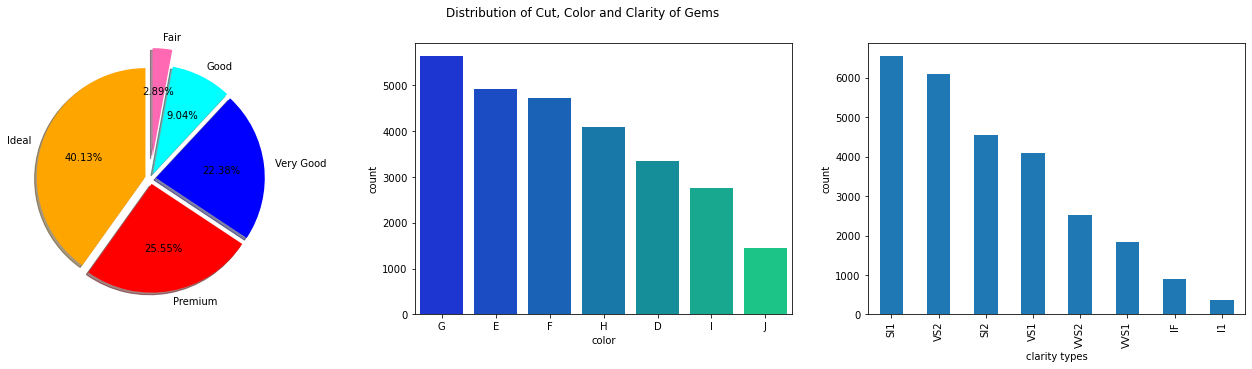

In [29]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(data['cut'].value_counts().values,
        labels=data['cut'].value_counts().index,
        startangle=90,
        colors=['orange', 'red', 'blue', 'cyan', 'hotpink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)

sns.countplot(data['color'], palette='winter', order=data['color'].value_counts().index)

plt.subplot(133)
data["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')
plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()


# Univaritate Analysis for

* Depth
* Carat
* Price

C:\Users\graje\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\graje\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\graje\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

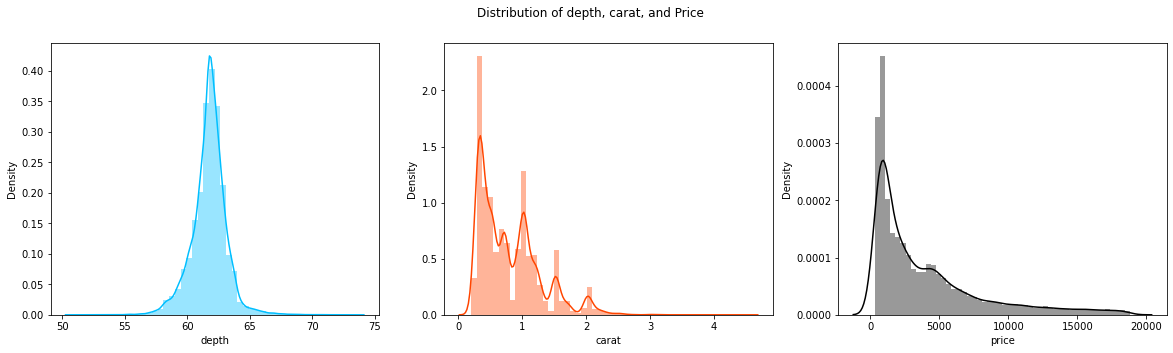

In [30]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(data['depth'], color='deepskyblue')

plt.subplot(132)
sns.distplot(data['carat'], color='orangered')

plt.subplot(133)
sns.distplot(data['price'], color='black')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

# Univaritate Analysis for variables


* x
* y
* z

C:\Users\graje\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\graje\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\graje\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


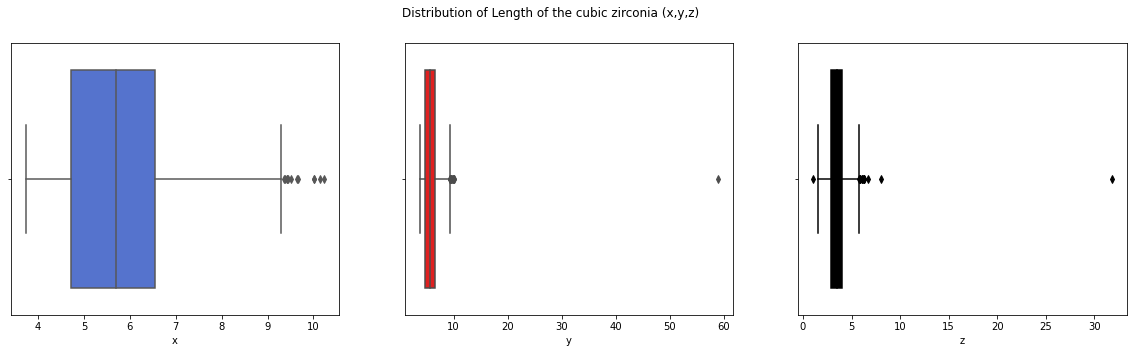

In [31]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(data['x'], color='royalblue')

plt.subplot(132)
sns.boxplot(data['y'], color='red')

plt.subplot(133)
sns.boxplot(data['z'], color='black')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

# MultiVariate Analysis


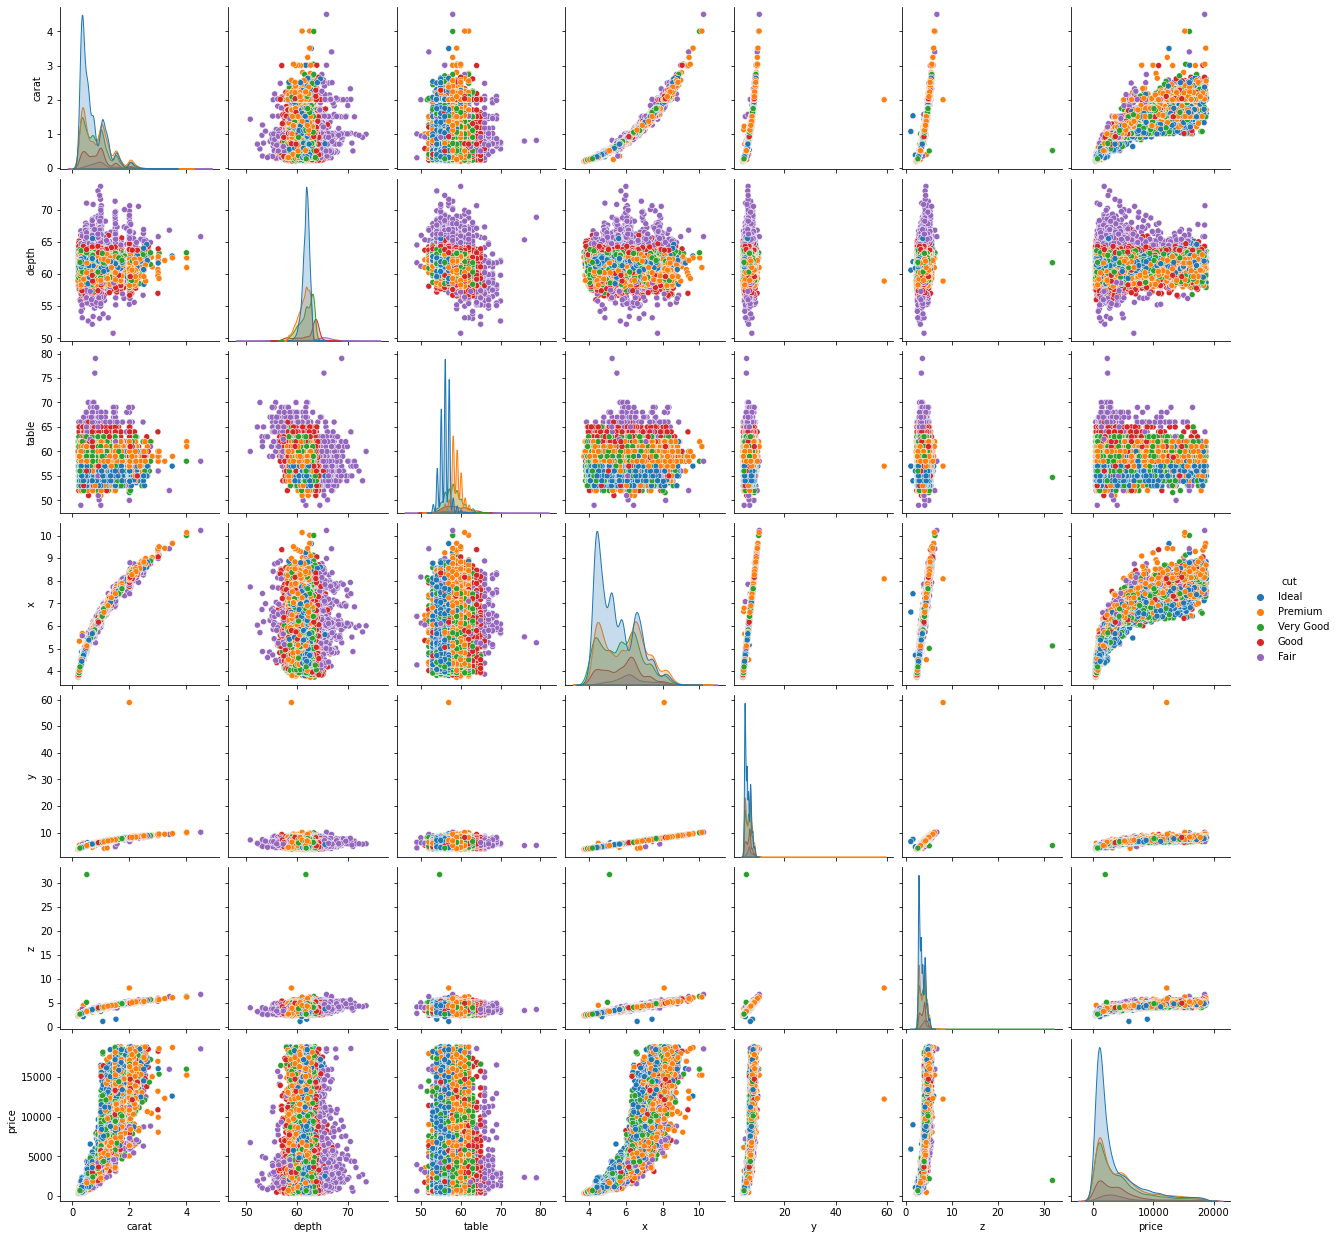

In [32]:
# Pairplot
sns.pairplot(data, hue = 'cut')
plt.show()

# Scatterplot of carat and curt against Price


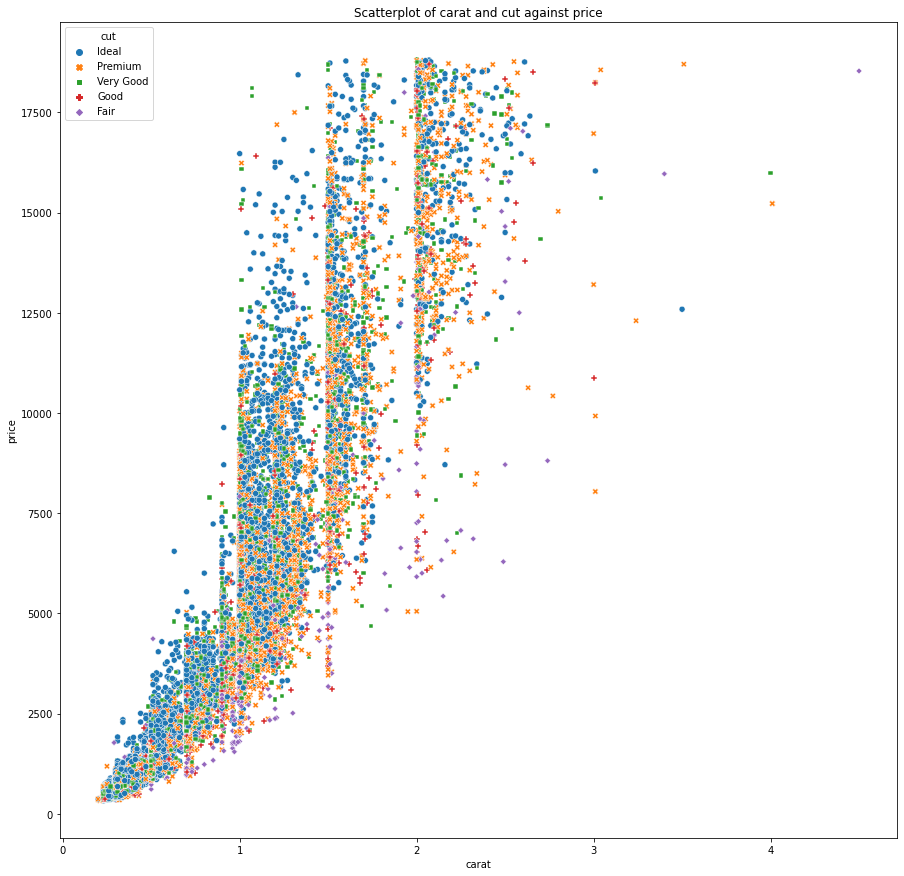

In [34]:
plt.figure(figsize = (15,15))
sns.scatterplot(data = data,x = 'carat', y = 'price', hue = 'cut', style = 'cut')
plt.title('Scatterplot of carat and cut against price')
plt.show()

* From above plot we can conclude that majority of our gemstone have ideal and premium cut and more then 50% of our gems lie between 0 to 2 carats.

# Scatterplot of carat and color against Price


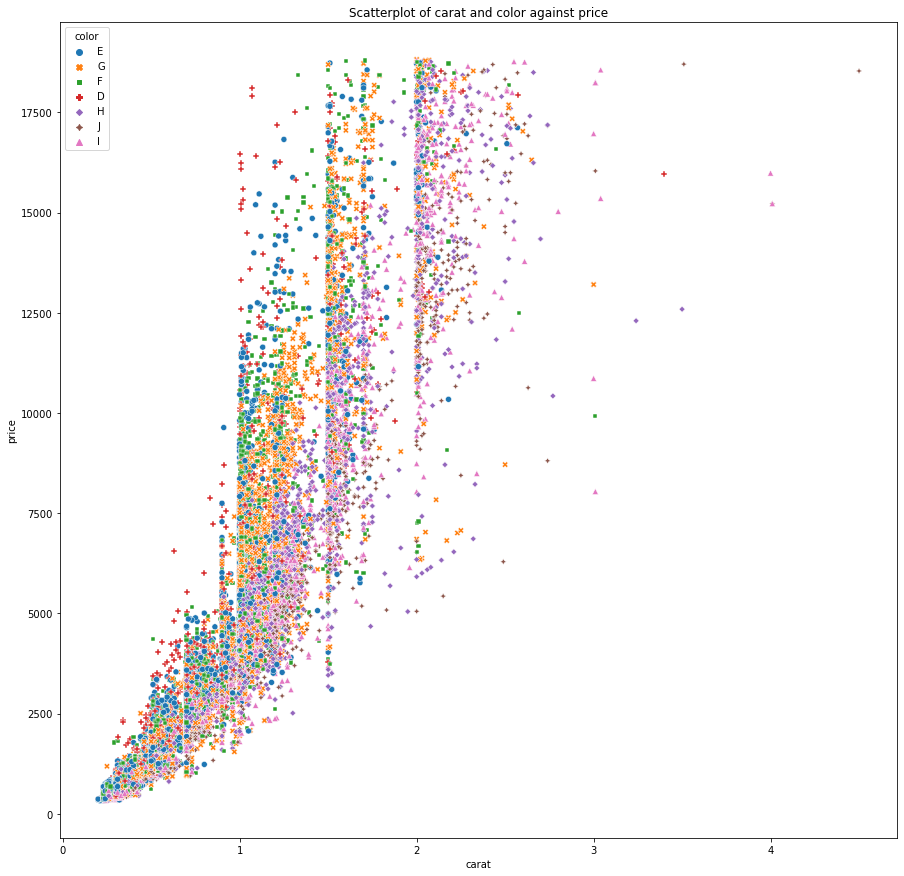

In [35]:
plt.figure(figsize = (15,15))
sns.scatterplot(data = data,x = 'carat', y = 'price', hue = 'color', style = 'color')
plt.title('Scatterplot of carat and color against price')
plt.show()

* From above plot we can conclude that majority of our gemstone belong to I and G grade color and more then 50% of our gems lie between 0 to 2 carats. with a mojority gems having price Less then equal to 10000

# Scatterplot of carat and clarity against Price


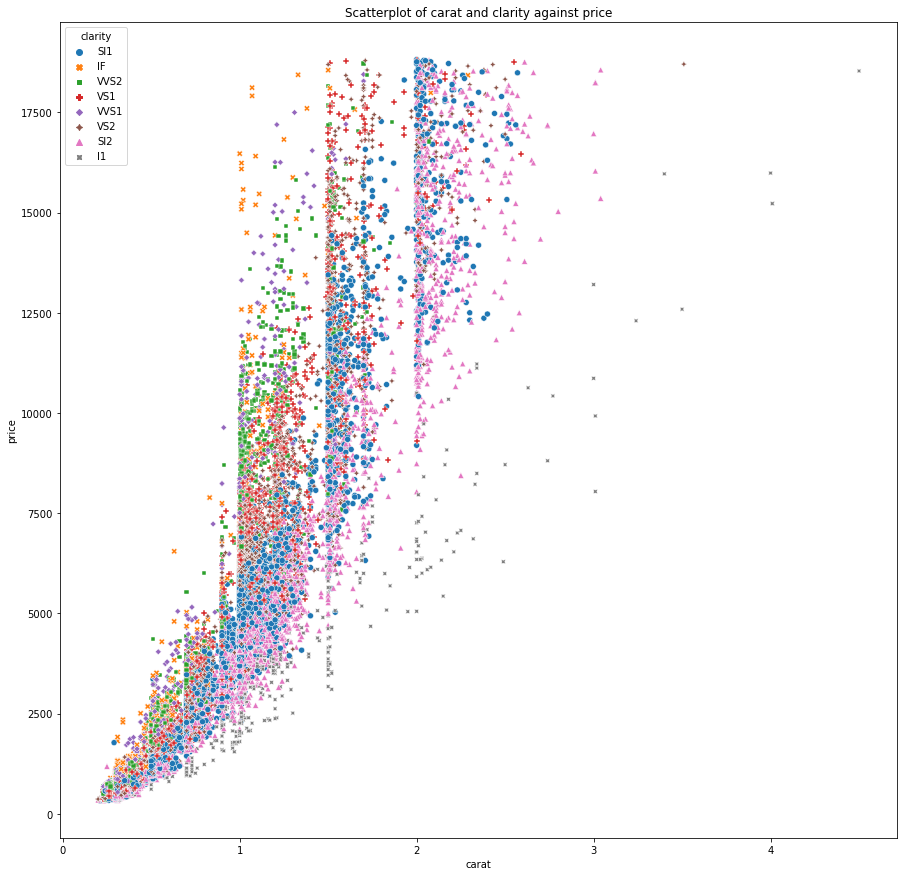

In [36]:
plt.figure(figsize = (15,15))
sns.scatterplot(data = data,x = 'carat', y = 'price', hue = 'clarity', style = 'clarity')
plt.title('Scatterplot of carat and clarity against price')
plt.show()